In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dataPath = "../Data/students_mental_health_survey.csv"

df = pd.read_csv(dataPath)

dataset_shape = df.shape
dataset_info = df.info
missing_vals = df.isnull().sum()
print(f"Dataset Shape: {dataset_shape}\nData Types and Column Info: \n{dataset_info}\nMissing Values: {missing_vals}")



Dataset Shape: (7022, 20)
Data Types and Column Info: 
<bound method DataFrame.info of       Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3           

In [47]:
# unique values per column:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Age':
[25 24 19 18 21 23 28 22 27 20 31 26 35 30 32 29 34 33]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Computer Science' 'Medical' 'Law']
Unique values in 'Gender':
['Male' 'Female']
Unique values in 'CGPA':
[3.56 2.44 3.74 3.65 3.4  3.35 3.8  3.05  nan 3.19 3.26 3.2  3.61 3.85
 3.46 3.43 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41
 3.22 3.33 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23
 3.7  2.95 3.73 3.64 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.
 3.29 2.98 3.04 3.51 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.84 3.92 3.28
 2.86 3.37 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81
 3.07 3.3  3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69
 3.98 3.47 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87
 2.64 2.84 2.88 2.8  3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76
 2.68 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66
 2.63 2.71 2.49 2.67]
Unique values in 'Stre

In [48]:
# make some of the columns from categorical into numerical
df['Gender'] = df['Gender'].apply(lambda x:  1 if x=='Male' else 0)

df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,1,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,0,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,0,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,1,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,1,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [49]:
mod_low_high = ['Physical_Activity', 'Social_Support', 'Extracurricular_Involvement']
yes_no = ['Family_History', 'Chronic_Illness']
freq = ['Substance_Use', 'Counseling_Service_Use']
good_bad = ['Sleep_Quality','Diet_Quality']

mod_low_high_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
yes_no_map = {'Yes': 1, 'No': 0}
freq_map = {'Never': 0, 'Occasionally': 0.5, None:None, 'Frequently': 1}
good_bad_map = {'Good': 1, 'Poor': 0,'Average':0.5}

for column in mod_low_high:
    df[column] = df[column].map(mod_low_high_mapping)

for column in yes_no:
    df[column] = df[column].map(yes_no_map)

for column in freq:
    df[column] = df[column].map(freq_map)

for column in good_bad:
    df[column] = df[column].map(good_bad_map)

In [50]:
relationship_map = {'Married': 1, 'Single': 0, 'In a Relationship':0.5}
housing_map = {'On-Campus': 0, 'Off-Campus': 0.5, 'With Family': 1}

df['Relationship_Status'] = df['Relationship_Status'].map(relationship_map)
df['Residence_Type'] = df['Residence_Type'].map(housing_map)

In [51]:
df = df.dropna()

In [52]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Age':
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
Unique values in 'Gender':
[1 0]
Unique values in 'CGPA':
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66 2.63
 2.71 2.49 2.67]
Unique values in 'Stress_Level':
[3 0 

C:\Users\sunny\AppData\Local\Temp\ipykernel_19956\2268140944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_names] = scaler.fit_transform(df[column_names])


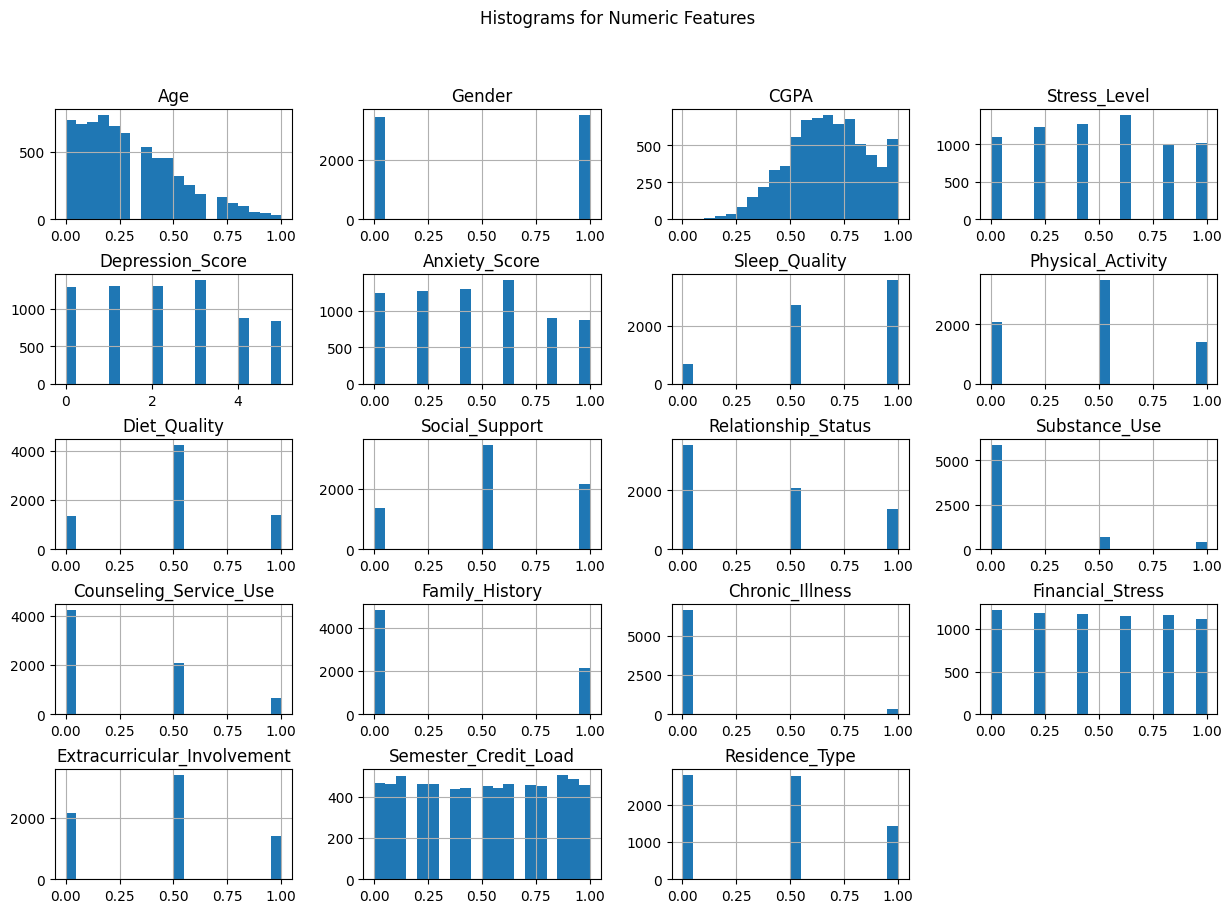

In [53]:
from sklearn.preprocessing import MinMaxScaler

column_names= ['Age', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Semester_Credit_Load', 'Financial_Stress']

scaler = MinMaxScaler()
df[column_names] = scaler.fit_transform(df[column_names])

df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()


In [54]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Age':
[0.41176471 0.35294118 0.05882353 0.         0.17647059 0.23529412
 0.52941176 0.11764706 0.76470588 0.47058824 1.         0.29411765
 0.70588235 0.82352941 0.64705882 0.58823529 0.94117647 0.88235294]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
Unique values in 'Gender':
[1 0]
Unique values in 'CGPA':
[0.71794872 0.         0.83333333 0.61538462 0.58333333 0.77564103
 0.87179487 0.48076923 0.52564103 0.48717949 0.75       0.90384615
 0.65384615 0.63461538 0.6025641  0.67948718 0.74358974 0.41025641
 0.92307692 0.49358974 0.75641026 0.46153846 0.81410256 0.66666667
 0.53205128 0.62179487 0.5        0.57051282 0.36538462 0.98076923
 1.         0.76282051 0.3525641  0.42948718 0.37179487 0.78205128
 0.41666667 0.43589744 0.88461538 0.50641026 0.80769231 0.82692308
 0.86538462 0.73717949 0.57692308 0.91666667 0.51282051 0.64102564
 0.42307692 0.51923077 0.69871795 0.35897436 0.54487179 0.34615385
 0.38461538 0.6

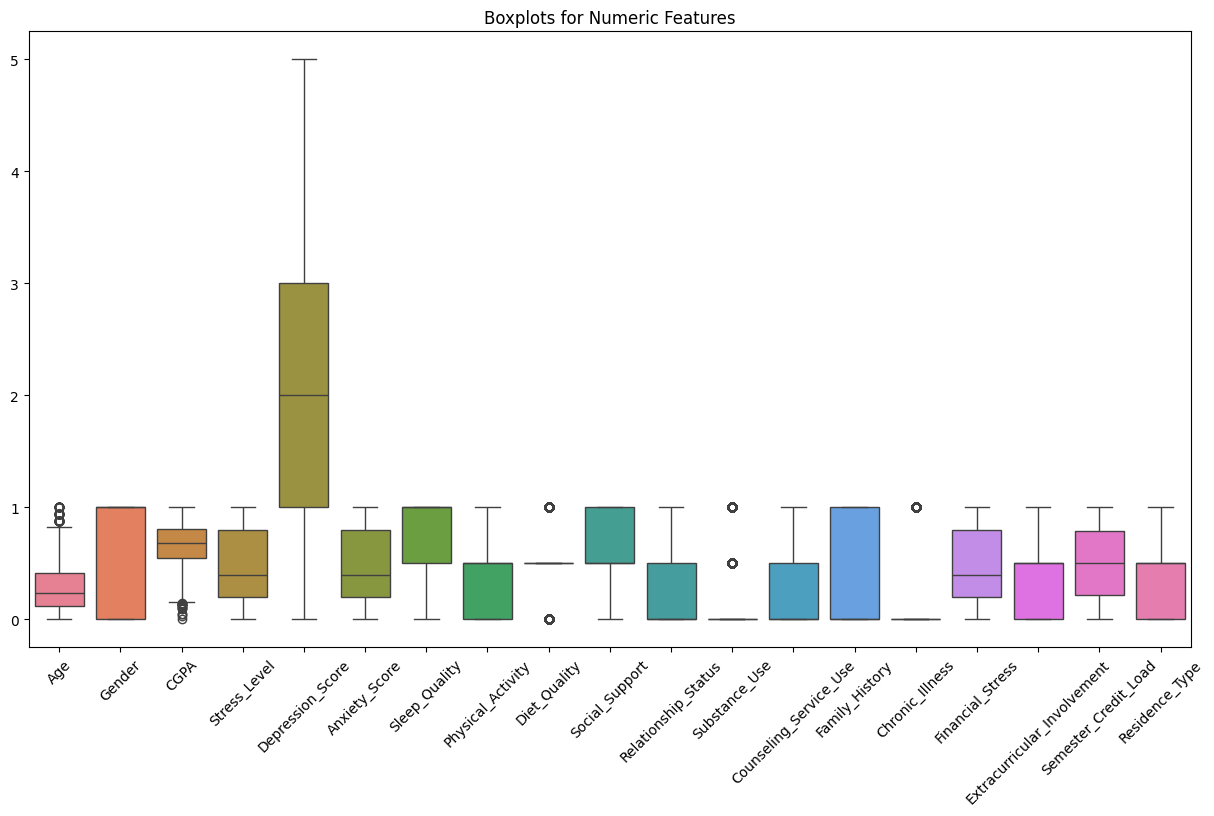

ValueError: could not convert string to float: 'Others'

<Figure size 1200x800 with 0 Axes>

In [56]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

all_cols =['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']
all_numeric_cols =['Age', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']


plt.figure(figsize=(12, 8))
correlation_matrix = df[all_numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CGPA', y='Stress_Level', hue='Gender')
plt.title('CGPA vs Stress Level by Gender')
plt.show()
